<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | head

# Extensions are just a norm! You have to inspect to be sure what something is

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
100Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
 American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
1Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
5240  100 15240    0     0  64576      0 -

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  90177      0 --:--:-- --:--:-- --:--:-- 90177
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [0]:
col_headers = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red',
              'green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters',
              'sunstars','crescent','triangle','icon','animate','text','topleft','botright']

flag_data = pd.read_csv(flag_data_url, header=None, names=col_headers)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data['language'] = flag_data['language'].map({1: 'English', 2:'Spanish', 3:'French', 4:'German', 5:'Slavic', 6:'Other Indo-European', 7:'Chinese', 8:'Arabic', 9:'Japanese/Turkish/Finnish/Magyar', 10:'Others'})
flag_data.head()


#This is also a way to do it:

# di = {1:"English", 2:"Spanish", 3:"French", 4:"German", 5:"Slavic", 6:"Other Indo-European",
#      7:"Chinese", 8:"Arabic", 9:"Japanese/Turkish/Finnish/Magyar", 10:"Others"}
# flag_data['language'] = flag_data.replace({"language": di})
# flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,Others,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,Other Indo-European,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,Arabic,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,English,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,Other Indo-European,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data['language'].value_counts()

Others                             46
English                            43
Other Indo-European                30
Spanish                            21
Arabic                             19
French                             17
German                              6
Japanese/Turkish/Finnish/Magyar     4
Chinese                             4
Slavic                              4
Name: language, dtype: int64

## Reading other CSVs



In [0]:
link1 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions.csv'
link2 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_index.csv'
link3 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_header.csv'

df = pd.read_csv(link1)
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
df.to_csv('test.csv')

In [0]:
df = pd.read_csv(link2, index_col=0)
# df - pd.read_csv(link2, usercols=range(1,8)) <--- this will give the same thing
# df = df.drop(df.columns[0], axis=1) <--- this will drop the first column
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
df = pd.read_csv(link3)
print(df.shape)
df.head()

# The file had 3 lines of non-data items that ended up being read in. 

(196, 7)


,"Summary of Drinks by Country from WHO Report, 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,https://fivethirtyeight.com/features/dear-mona...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
3,Afghanistan,0,0,0,0,Asia,Southern Asia
4,Albania,89,132,54,4.9,Europe,Southern Europe


In [0]:
df= pd.read_csv(link3, header=3)
# df= pd.read_csv(link3, skiprows=3) <--- another method to do same thing
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


## Loading from a local CSV to Google Colab

In [0]:
# one way is to directly load files into google colab files directory

from google.colab import files
uploaded = files.upload()

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

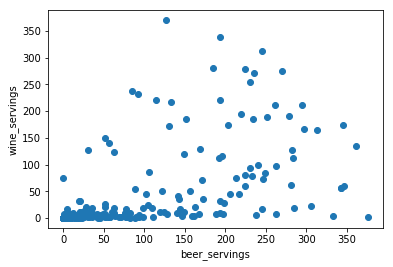

In [0]:
import matplotlib.pyplot as plt

# Scatter Plot in Matplotlib
plt.scatter(df['beer_servings'], df['wine_servings'])
plt.xlabel('beer_servings')
plt.ylabel('wine_servings')
plt.show()

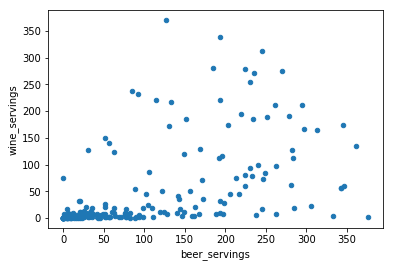

In [0]:
#Scatter Plot with Pandas
df.plot.scatter('beer_servings', 'wine_servings');

(array([37., 16., 12., 18.,  4., 11., 10.,  5., 15., 15.,  7.,  6.,  5.,
         7., 11.,  8.,  3.,  2.,  0.,  1.]),
 array([ 0.  ,  0.72,  1.44,  2.16,  2.88,  3.6 ,  4.32,  5.04,  5.76,
         6.48,  7.2 ,  7.92,  8.64,  9.36, 10.08, 10.8 , 11.52, 12.24,
        12.96, 13.68, 14.4 ]),
 <a list of 20 Patch objects>)

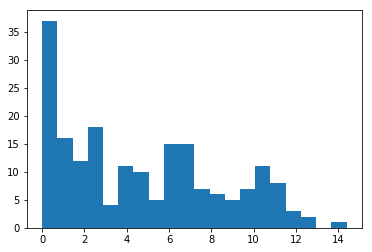

In [0]:
# Histogram (matplotlib)

plt.hist(df['total_litres_of_pure_alcohol'], bins = 20)
# can use ; to get rid of array, but it has info on distribution in array

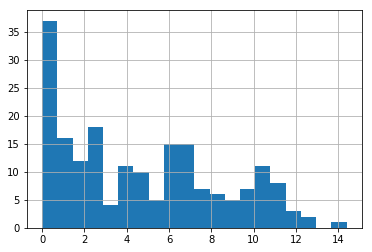

In [0]:
#Pandas histogram

df['total_litres_of_pure_alcohol'].hist(bins=20)

In [0]:
# Seaborn Density Plot

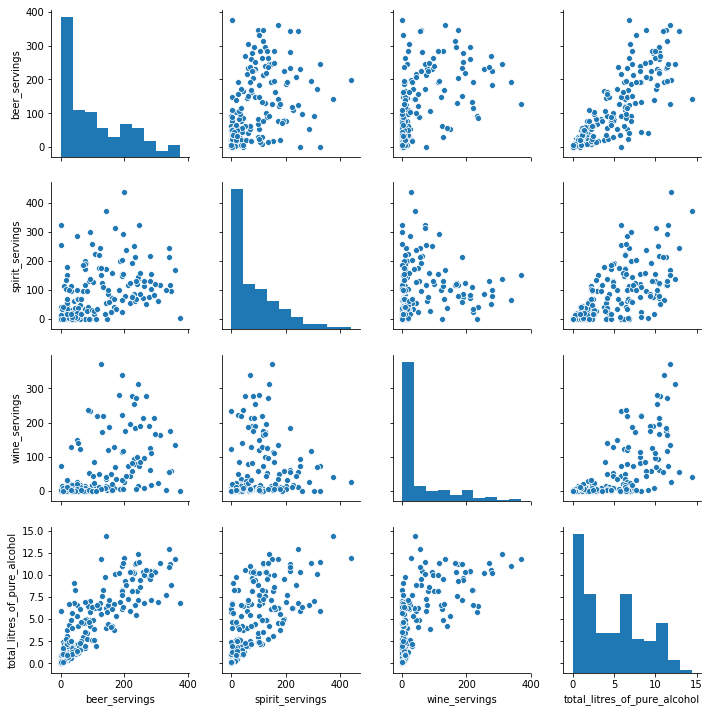

In [0]:
# Seaborn Pairplot

import seaborn as sns

sns.pairplot(df)

## Create the same basic Visualizations using Pandas

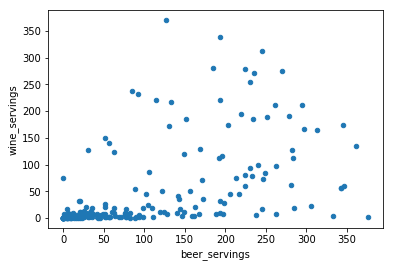

In [0]:
# Pandas Scatterplot

df.plot.scatter('beer_servings', 'wine_servings')

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.isna().sum() #not all missing values are represeted by NAs and NaNs 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [0]:
# We change it by adding na_values to read_csv

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df['country'].unique() # this pointed us to see that there were spaces preceding many strings, so we updated na_values above to ' ?' instead of '?'

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [0]:
df.dropna(inplace=True) 
# this does the same as --- df = df.dropna()
df.shape

(30162, 15)

In [0]:
df.dropna(subset=['country'], inplace=True)
df.shape

(31978, 15)

In [0]:
df.isna().sum()

age                  0
workclass         1809
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1816
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country              0
salary               0
dtype: int64

In [0]:
df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

## Fill Missing Values

In [0]:
df.mode().iloc[0]

age                                36
workclass                     Private
fnlwgt                         123011
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation             Prof-specialty
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
country                 United-States
salary                          <=50K
Name: 0, dtype: object

In [0]:
df = df.fillna(df.mode().iloc[0]) #this replaces each column with the mode
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df['occupation'].value_counts()

 Prof-specialty       5854
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [0]:
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

# Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Refugees in the United States 2006 to 2015



### Cleaning the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/lechemrc/Datasets-to-ref/master/refugee_statistics.csv')
print(df.shape)
df.head()

(28, 5)


,Sex/Age/Marital Status,Applicants,Spouses,Children,All Refugees
0,Female,"10,082","8,688","14,565","33,335"
1,Male,"18,317","2,104","16,163","36,584"
2,Sex Unknown,1,-,-,1
3,Under 16 Years,679,-,"24,309","24,988"
4,16 to 20 Years,"1,354",176,"5,376","6,906"


In [5]:
df.isna().sum()

Sex/Age/Marital Status    0
Applicants                0
Spouses                   0
Children                  0
All Refugees              0
dtype: int64

In [6]:
df['Spouses'].unique()

array(['8,688', '2,104', '-', '176', '10,616', '64', '950', '2,056',
       '2,151', '1,679', 'D', '436', '305', '301', '80', '10,787',
       '10,792'], dtype=object)

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/lechemrc/Datasets-to-ref/master/refugee_statistics.csv', na_values=['-', 'D', 'X'])
df2 = pd.read_csv('https://raw.githubusercontent.com/lechemrc/Datasets-to-ref/master/refugee_status.csv', index_col=0,na_values=['-', 'D', 'X'])
print(df.shape)
df.head()

# trying to decide which set would be more interesting... also when the first df 
# takes place, as in which year

(28, 5)


,Sex/Age/Marital Status,Applicants,Spouses,Children,All Refugees
0,Female,"10,082","8,688","14,565","33,335"
1,Male,"18,317","2,104","16,163","36,584"
2,Sex Unknown,1,NaN,NaN,1
3,Under 16 Years,679,NaN,"24,309","24,988"
4,16 to 20 Years,"1,354",176,"5,376","6,906"


In [8]:
print(df2.shape)
df2.head()

(70, 10)


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2.isna().sum()

2006    10
2007    13
2008    15
2009    10
2010    11
2011    12
2012    15
2013    13
2014    12
2015    12
dtype: int64

In [10]:
df2['2006'].unique()

array(['18,129', '10,086', '9,615', '3,145', nan, '119', '651', '13',
       '87', '77', '350', '3', '16', '1,612', '466', '9', '29', '23', '4',
       '21', '115', '405', '66', '3,143', '11', '538', '1,271', '6', '10',
       '2,792', '202', '124', '5', '15', '830', '2,346', '88', '721',
       '20', '6,003', '112', '439', '10,357', '1,848', '27', '18',
       '2,483', '527', '3,039', '36', '41,094'], dtype=object)

In [0]:
# df2['2006'].plot.bar()

#not sure yet what's going wrong here, but I'll figure it out. Keeping for learning purposes.

In [12]:
df2

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South America,119,54,100,57,126,46,130,233,252,522
Unknown,NaN,NaN,9,65,"1,053",136,148,164,141,99
Afghanistan,651,441,576,349,515,428,481,661,753,910
Angola,13,4,NaN,8,NaN,NaN,NaN,6,NaN,5


In [13]:
df2_fill = df2.bfill(axis=1)
df2_fill

# I started with back fill on the row axis to make sure that it was decently consistent 
# from country to country, instead of from above or below when numbers varied wildly. 

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South America,119,54,100,57,126,46,130,233,252,522
Unknown,9,9,9,65,"1,053",136,148,164,141,99
Afghanistan,651,441,576,349,515,428,481,661,753,910
Angola,13,4,8,8,6,6,6,6,5,5


In [14]:
df2_fill.isna().sum()

2006     1
2007     3
2008     3
2009     3
2010     3
2011     4
2012     6
2013     7
2014     7
2015    12
dtype: int64

In [15]:
df2_fill = df2_fill.ffill(axis=1)
df2_fill

# I then went to forward fill on the row axis for the same reason as above

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South America,119,54,100,57,126,46,130,233,252,522
Unknown,9,9,9,65,"1,053",136,148,164,141,99
Afghanistan,651,441,576,349,515,428,481,661,753,910
Angola,13,4,8,8,6,6,6,6,5,5


In [16]:
df2_fill.isna().sum()

2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
dtype: int64

In [17]:
df2_fill = df2_fill.fillna(value=0)
df2_fill

# I decided to fill countries (only one in this case) with no data with 0
# to be consistent with the lack of information. This way the data isn't skewed
# by a country with no data

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
Oceania,0,0,0,0,0,0,0,0,0,0
South America,119,54,100,57,126,46,130,233,252,522
Unknown,9,9,9,65,"1,053",136,148,164,141,99
Afghanistan,651,441,576,349,515,428,481,661,753,910
Angola,13,4,8,8,6,6,6,6,5,5


In [18]:
df2_fill.isna().sum()

2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

In [19]:
print(df2_fill.dtypes)
df2_fill.info()

2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, Africa to Total
Data columns (total 10 columns):
2006    70 non-null object
2007    70 non-null object
2008    70 non-null object
2009    70 non-null object
2010    70 non-null object
2011    70 non-null object
2012    70 non-null object
2013    70 non-null object
2014    70 non-null object
2015    70 non-null object
dtypes: object(10)
memory usage: 6.0+ KB


In [0]:
# df2_fill = pd.concat([pd.DataFrame([pd.to_numeric(df2_fill[e],errors='coerce') \
#                                for e in df2_fill.columns if e not in ['Continent/Country of Nationality']]).T,\
#                  df2_fill[['Continent/Country of Nationality']]],axis=1)

# df2_fill.info()


# # this is code I adapted from a stack overflow question. I have an idea of how it
# # is working, but there are a couple things I have questions on. It clearly did 
# # what I was hoping, since it turned the columns of years into float64 instead
# # of objects I was unable to use in plotting. 

In [21]:
numeric = df2_fill.columns.tolist()
print(numeric)

# this was to create a list with the column titles to do the next step

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [22]:
df2_fill[numeric] = df2_fill[numeric].apply(lambda x: pd.to_numeric(x.astype(str)
                                                                    .str.replace(',',''), errors='coerce'))
df2_fill

# this changed the objects into numbers, since it was being thrown off by the 
# commas in the numbers, which pandas didn't recognize 

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,18129,17486,8943,9678,13325,7693,10629,15984,17501,22492
Asia,10086,23564,44819,58309,52695,44583,44416,48840,47197,43115
Europe,9615,4192,2059,1693,1238,996,908,482,818,2164
North America,3145,2922,4177,4800,4856,2930,1948,4206,4066,1528
Oceania,0,0,0,0,0,0,0,0,0,0
South America,119,54,100,57,126,46,130,233,252,522
Unknown,9,9,9,65,1053,136,148,164,141,99
Afghanistan,651,441,576,349,515,428,481,661,753,910
Angola,13,4,8,8,6,6,6,6,5,5


### Displaying the data

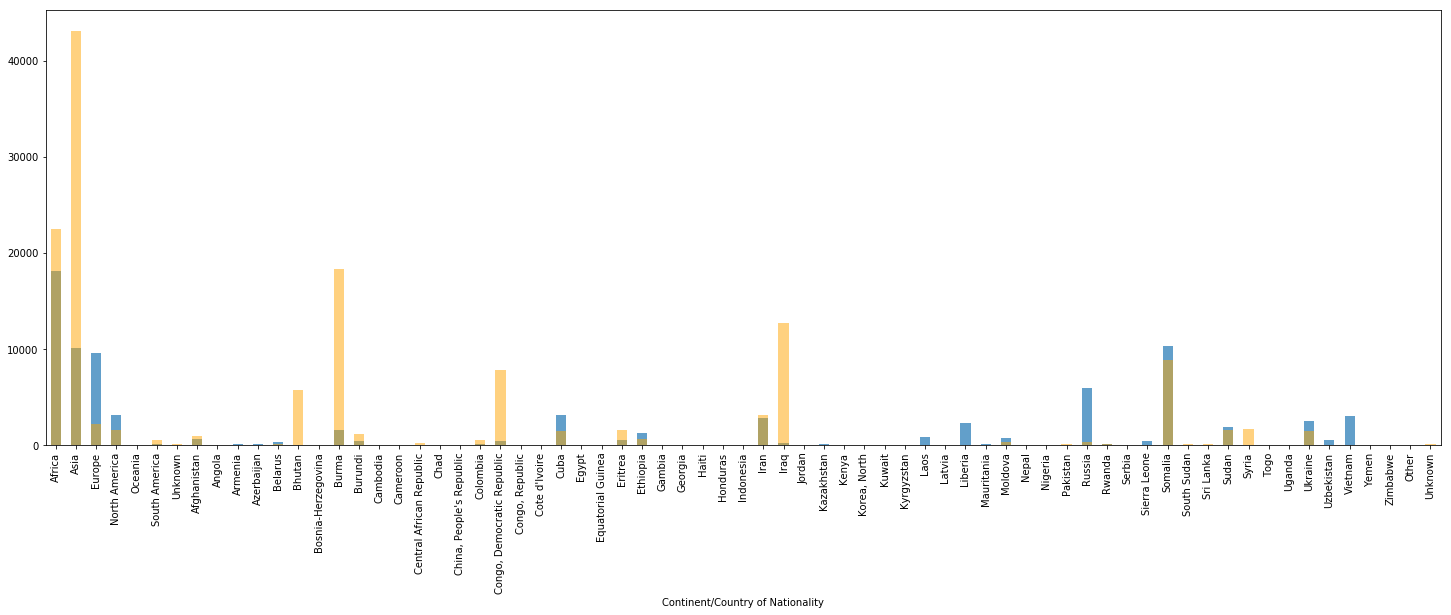

In [96]:
# df.set_index('Continent/Country of Nationality')
df2_fill['2006'][0:-1].plot.bar(figsize=(25,8), alpha=0.7)
df2_fill['2015'][0:-1].plot.bar(figsize=(25,8), color='orange', alpha=0.5)
plt.show()

# I'm struggling to list the countries/continents for the xticks instead of index
# update: got it!

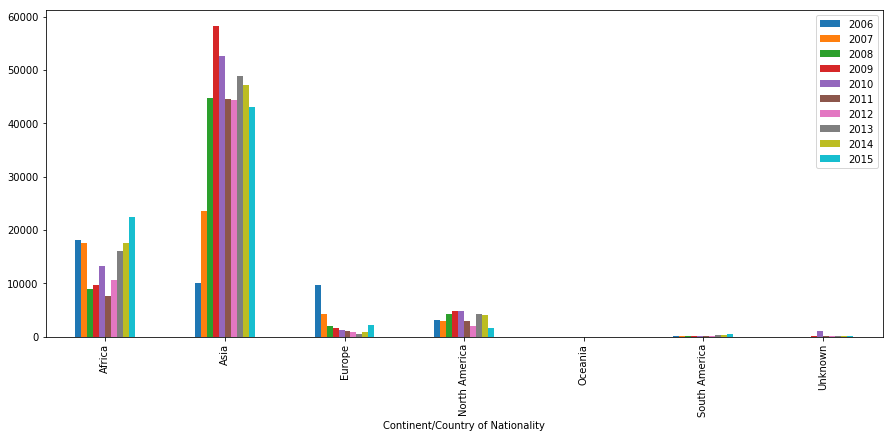

In [32]:
df2_fill[0:7].plot.bar(figsize=(15,6));

In [33]:
df2_fill.iloc[0]

2006    18129
2007    17486
2008     8943
2009     9678
2010    13325
2011     7693
2012    10629
2013    15984
2014    17501
2015    22492
Name: Africa, dtype: int64

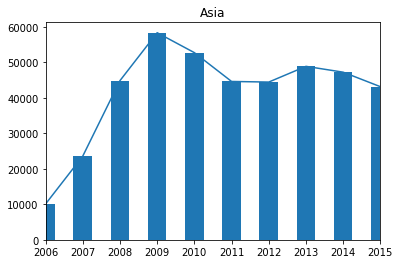

In [98]:
cc = 1
row = df2_fill.iloc[cc]
row.plot.bar(title=df2_fill.index[cc])
row.plot.line();

In [0]:
sns.pairplot(df2_fill)
# this really doesn't give me easy readable data

In [0]:
# sns.lineplot(x=df2_fill.iloc[0][:], y=row)

In [38]:
df2_fill.iloc[0][:]

2006    18129
2007    17486
2008     8943
2009     9678
2010    13325
2011     7693
2012    10629
2013    15984
2014    17501
2015    22492
Name: Africa, dtype: int64

In [40]:
df2_fill.iloc[0][0]

18129

#Affirmative Asylum Statistics in the United States 

###  Cleaning Data

In [55]:
asylum = pd.read_csv('https://raw.githubusercontent.com/lechemrc/Datasets-to-ref/master/affirmative_asylum.csv', index_col=0, na_values=['-', 'D'])
print(asylum.shape)
asylum.head()

(109, 10)


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"2,112","2,567","2,686","2,852","2,666","3,055","5,054","4,860","4,303","3,724"
Asia,"3,340","4,446","4,846","5,556","5,421","6,467","8,031","7,528","7,429","6,652"
Europe,553,672,755,812,729,961,"1,213",778,571,729
North America,"3,600","2,243","1,753","1,484","1,421","1,543","1,649","1,143","1,594","5,811"
Oceania,18,27,23,18,8,19,20,10,21,4


In [56]:
asylum.isna().sum()

2006     8
2007    10
2008     8
2009     5
2010     8
2011     5
2012     3
2013     5
2014     3
2015     6
dtype: int64

In [57]:
asylum # visualizing where the NaNs are 

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"2,112","2,567","2,686","2,852","2,666","3,055","5,054","4,860","4,303","3,724"
Asia,"3,340","4,446","4,846","5,556","5,421","6,467","8,031","7,528","7,429","6,652"
Europe,553,672,755,812,729,961,"1,213",778,571,729
North America,"3,600","2,243","1,753","1,484","1,421","1,543","1,649","1,143","1,594","5,811"
Oceania,18,27,23,18,8,19,20,10,21,4
South America,"3,384","2,440","1,974","1,129",929,"1,327","1,423",846,630,911
Unknown,41,53,92,129,53,47,38,40,35,47
Afghanistan,9,43,45,80,113,119,157,96,105,156
Albania,44,33,32,33,27,18,21,14,31,22


In [58]:
asylum = asylum.bfill(axis=1)
asylum

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"2,112","2,567","2,686","2,852","2,666","3,055","5,054","4,860","4,303","3,724"
Asia,"3,340","4,446","4,846","5,556","5,421","6,467","8,031","7,528","7,429","6,652"
Europe,553,672,755,812,729,961,"1,213",778,571,729
North America,"3,600","2,243","1,753","1,484","1,421","1,543","1,649","1,143","1,594","5,811"
Oceania,18,27,23,18,8,19,20,10,21,4
South America,"3,384","2,440","1,974","1,129",929,"1,327","1,423",846,630,911
Unknown,41,53,92,129,53,47,38,40,35,47
Afghanistan,9,43,45,80,113,119,157,96,105,156
Albania,44,33,32,33,27,18,21,14,31,22


In [0]:
asylum = asylum.ffill(axis=1)

In [60]:
asylum.isna().sum()

2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

In [61]:
print(asylum.info())
asylum.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, Africa to Total
Data columns (total 10 columns):
2006    109 non-null object
2007    109 non-null object
2008    109 non-null object
2009    109 non-null object
2010    109 non-null object
2011    109 non-null object
2012    109 non-null object
2013    109 non-null object
2014    109 non-null object
2015    109 non-null object
dtypes: object(10)
memory usage: 9.4+ KB
None


2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
dtype: object

In [62]:
nums = asylum.columns.tolist()
print(nums)

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [63]:
asylum[nums] = asylum[nums].apply(lambda x: pd.to_numeric(x.astype(str)
                                                    .str.replace(',',''), errors='coerce'))

asylum.dtypes

2006    float64
2007    float64
2008      int64
2009      int64
2010      int64
2011      int64
2012      int64
2013      int64
2014      int64
2015      int64
dtype: object

### Visualizing the data

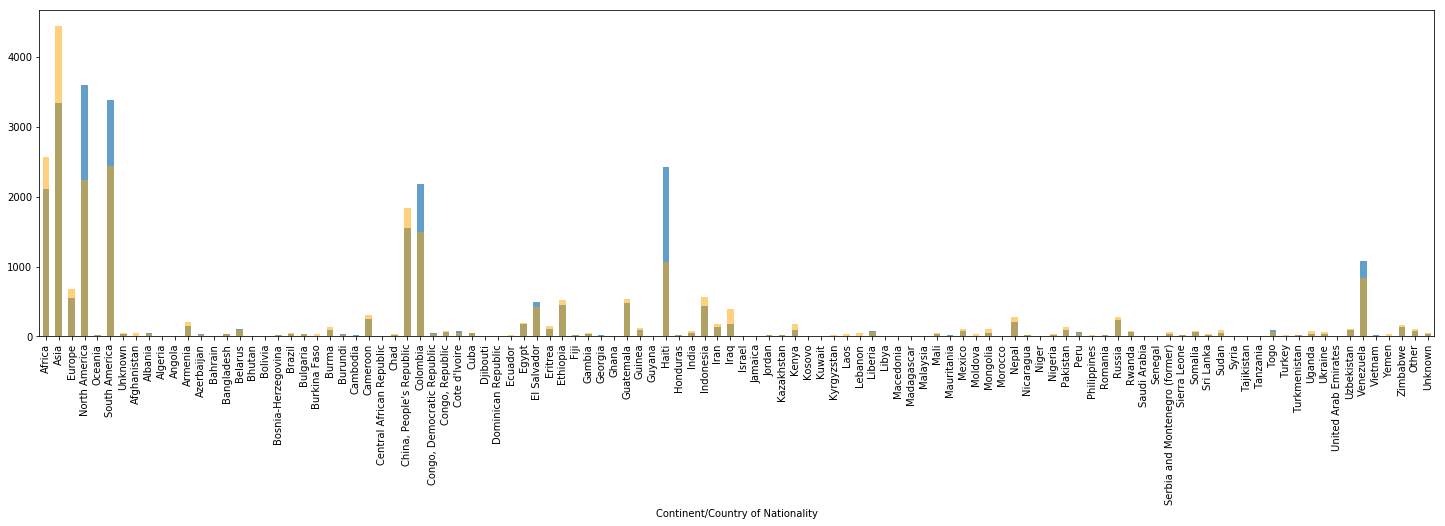

In [64]:
asylum['2006'][0:-1].plot.bar(figsize=(25,6), alpha=0.7);
asylum['2007'][0:-1].plot.bar(figsize=(25,6), color='orange', alpha=0.5);

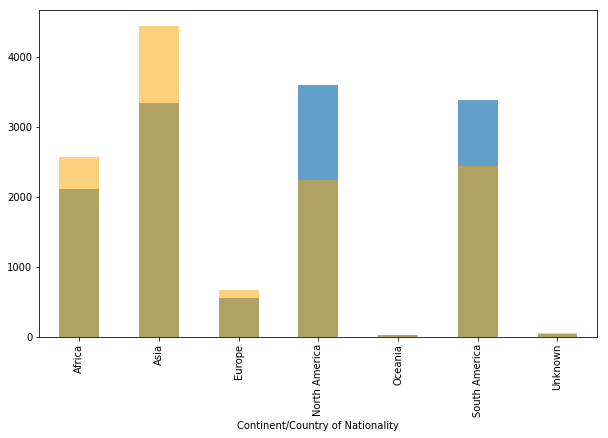

In [100]:
asylum['2006'][0:7].plot.bar(figsize=(10,6), alpha=0.7);
asylum['2007'][0:7].plot.bar(figsize=(10,6), color='orange', alpha=0.5);

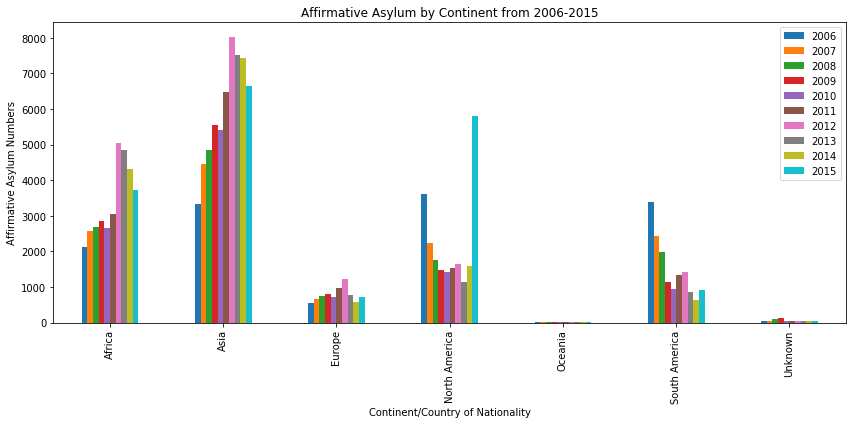

In [101]:
asylum[0:7].plot.bar(figsize=(12,6), title="Affirmative Asylum by Continent from 2006-2015");
# plt.bar(asylum[0:7])
plt.ylabel('Affirmative Asylum Numbers')
plt.tight_layout()


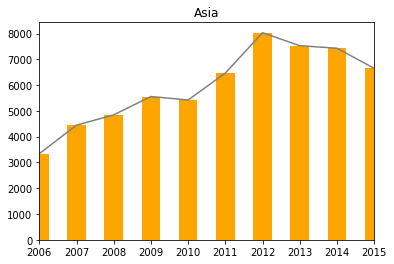

In [69]:
val = 1
single = asylum.iloc[val]
single.plot.bar(title=asylum.index[val], color='orange')
single.plot.line(color='gray');

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
!pip install spotipy

In [0]:
from tqdm import tqdm
tqdm.pandas()

In [0]:
import pandas as pd
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="367d1c06f500433b9f3202d79d3eb8a9" 
secret = "9ddba8a64fe84f528143d99b65ea94f5"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [0]:
artist_name = []
track_name = []
track_id = []
popularity = []

for i in range(0,10000,50):
    track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, j in enumerate(track_results['tracks']['items']):
        artist_name.append(j['artists'][0]['name'])
        track_name.append(j['name'])
        track_id.append(j['id'])
        popularity.append(j['popularity'])

In [93]:
df = pd.DataFrame(list(zip(artist_name, track_name, track_id, popularity)), 
                  columns=['Artist Name', 'Track Name', 'Track ID', 'Popularity'])
df.head()

,Artist Name,Track Name,Track ID,Popularity
0,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100
1,Billie Eilish,bad guy,2Fxmhks0bxGSBdJ92vM42m,97
2,Drake,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,92
3,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,91
4,Lil Nas X,Panini,6fTt0CH2t0mdeB2N9XFG5r,91


In [94]:
df['Artist Name'].value_counts()

Ludwig van Beethoven       76
Jaden                      75
Steve Void                 67
Big K.R.I.T.               48
Ed Sheeran                 46
Randy Newman               43
Chris Brown                42
Machine Gun Kelly          41
PnB Rock                   41
Beyoncé                    41
Armin van Buuren           40
Dreamville                 40
Tracy Lawrence             37
America                    36
Johann Sebastian Bach      35
K.Flay                     32
Mustard                    31
Juice WRLD                 30
Future                     29
Sleepy Dogs                29
P!nk                       28
Lizzo                      28
Alan Menken                28
Logic                      27
Chance the Rapper          27
Wiz Khalifa                27
Khalid                     26
Marshmello                 25
Mark Ronson                24
Khruangbin                 23
                           ..
Johnny Gill                 1
Rare Americans              1
Chesca    

In [95]:
for i in range(0,10000,50):
    track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, j in enumerate(track_results['tracks']['items']):
        artist_name.append(j['artists'][0]['name'])
        track_name.append(j['name'])
        track_id.append(j['id'])
        popularity.append(j['popularity'])
        

df2 = pd.DataFrame(list(zip(artist_name, track_name, track_id, popularity)), 

                  columns=['Artist Name', 'Track Name', 'Track ID', 'Popularity'])

df2.head()

,Artist Name,Track Name,Track ID,Popularity
0,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100
1,Billie Eilish,bad guy,2Fxmhks0bxGSBdJ92vM42m,97
2,Drake,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,92
3,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,91
4,Lil Nas X,Panini,6fTt0CH2t0mdeB2N9XFG5r,91
